# Hand written digit classification with Keras

MNIST is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.  

This dataset is perfect for people who want to try machine learning techniques on real world data, with minimal effort. The digits have been isolated and the images have been scaled and centered. You can find more information about the MNIST dataset on the [MNIST official website](http://yann.lecun.com/exdb/mnist/).

In this tutorial, we are using deep learning library [Keras](http://www.keras.io/) to classify those hand-written digits. The available classes are `0 1 2 3 4 5 6 7 8 9`.


## 1. Load dependencies

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(75)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop

## 2.  Load the dataset

Keras has build-in functions for downloading some [well-known datasets](https://keras.io/datasets/).  
At the moment of writing, there are two text dataset and three image datasets.

In [82]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

These are some of the training images 

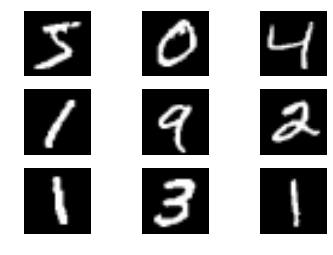

In [83]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")

### Excercise 2.1 - Inspect the dataset
1. X_train, y_train, X_test and y_test are matrices. What are the dimensions of these matrices?
2. Can you explain where these numbers come from?
3. Inspect the content of X_train and y_train

### (Exercise 2.2 - Python functions)
4.  Turn the code snippet for plotting into a function
```
def function(images, ncol=3)
    """Turns a list of matrices into a grid of heatmaps."""
```


## 3. Design a deep neural network

Representation learning is at the hard of deep learning: instead of crafting manual features, the network learns a representation of handwriting, that is disributed over several layers. The final layer uses the learnt by the previous layers to classify the image into one of 10 available categories. The layered structure is typical for neural networks, as layers can be conveniently trained with a [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algorithm. 

It is time to design a neural network architecture capable of learning a representation of the above images.
We create a model with three dense layers and a dropout layer after the first two layers. 



https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

In [84]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [85]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_26 (Dense)                 (None, 512)           401920      dense_input_11[0][0]             
____________________________________________________________________________________________________
activation_24 (Activation)       (None, 512)           0           dense_26[0][0]                   
____________________________________________________________________________________________________
dropout_15 (Dropout)             (None, 512)           0           activation_24[0][0]              
____________________________________________________________________________________________________
dense_27 (Dense)                 (None, 256)           131328      dropout_15[0][0]                 
___________________________________________________________________________________________

### Excercise 3.1 - Parameters
1. How many parameters does each layer have?
2. How many parameters has the dropout function?
3. How many parameters has the model in total?
4. What is the advantage of having many parameters?
5. Can you see disadvantages of having many parameters?

### Excercise 3.2 - Activation functions
2. What is the role of an activation function?
3. What does the relu activation function do?
3. What other activation functions does Keras provide?
4. What happens is you leave out the activation function?

In [ ]:
4. What happens is you leave out the activation function

### Exercise 3.3 - Keras

## Train the neural network

Before we can train the model, we need to reshape and rescale the input. The re-shape is needed since keras expects one-dimensional input for dense layers. Without rescaling, the relu activation functions would be overstimulated, resulting in cell damage.

In [91]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = flatten(x_train) / 255
X_test = flatten(x_test) / 255

In [88]:
batch_size = 128
nb_epoch = 20

In [92]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s - loss: 0.2610 - acc: 0.9196 - val_loss: 0.1111 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 0.1076 - acc: 0.9670 - val_loss: 0.0815 - val_acc: 0.9758
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 0.0770 - acc: 0.9764 - val_loss: 0.0762 - val_acc: 0.9773
Epoch 4/20
60000/60000 [==============================] - 10s - loss: 0.0641 - acc: 0.9809 - val_loss: 0.0675 - val_acc: 0.9810
Epoch 5/20
60000/60000 [==============================] - 10s - loss: 0.0519 - acc: 0.9842 - val_loss: 0.0761 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 10s - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0765 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 10s - loss: 0.0393 - acc: 0.9882 - val_loss: 0.0795 - val_acc: 0.9805
Epoch 8/20
60000/60000 [==============================] -

### Exercise 3.1 - Batches and Epochs
1. The batch size is set to 128. What does this mean?
2. The number of epochs is 20. What does that mean?